In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import seaborn as sns 

In [44]:
df=pd.read_csv("StudentGrades.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [45]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [46]:
df.rename(columns = {'gender': 'sex',
                     'race/ethnicity' : 'ethnicity group',
                     'parental level of education' : 'education level'},
          inplace = True)

#df.rename() estamos remplazando el nombre de las columnas

df.head()

,sex,ethnicity group,education level,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.drop(['lunch','ethnicity group'], axis = 1)

,sex,education level,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75
...,...,...,...,...,...,...
995,female,master's degree,completed,88,99,95
996,male,high school,none,62,55,55
997,female,high school,completed,59,71,65
998,female,some college,completed,68,78,77


## 1. ¿Cual es el promedio de las calificaciones de escritura en hombres y mujeres?

In [48]:
pv1=pd.pivot_table(df,
                   index = 'sex',
                   aggfunc ='median',
                   values=['writing score'],
                   margins = True,
                  )
pv1

,writing score
sex,
female,74
male,64
All,69


In [49]:
pv1=pv1.drop(['All'],
             axis = 0)

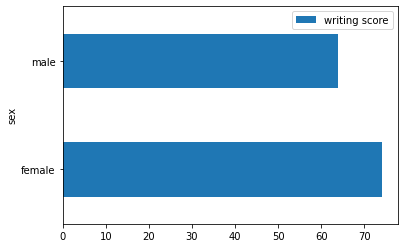

In [50]:
pv1.plot(kind = 'barh')

## 2. ¿Entre la calificación de escritura y matematicas, cual tiene mejor resultado por genero?

In [51]:
pv2=pd.pivot_table(df,
                   index = 'sex',
                   aggfunc ='median',
                   values=['writing score','reading score'],
                   margins = True,
                  )
pv2

,reading score,writing score
sex,,
female,73,74
male,66,64
All,70,69


In [54]:
pv2=pv2.drop(['All'],
        axis = 0)

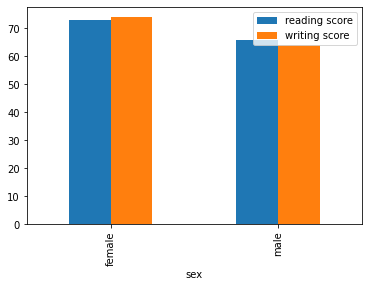

In [55]:
pv2.plot(kind = 'bar')

## 3. ¿Que tanto beneficio el curso de preparacion en los puntajes?

In [56]:
pv3=pd.pivot_table(df,
                   index = 'test preparation course',
                   aggfunc= 'median',
                   values = ['math score', 'reading score', 'writing score'],
                   margins = True,
                  )
pv3

,math score,reading score,writing score
test preparation course,,,
completed,69,75,76
none,64,67,65
All,66,70,69


In [57]:
pv3=pv3.drop(['All'],
        axis = 0)

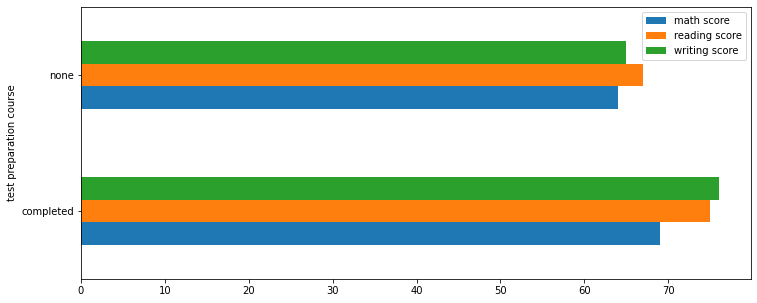

In [59]:
pv3.plot(kind = 'barh', figsize = (12,5))